In [1]:
import os
import torch,glob
import torch.nn as nn
import matplotlib.pyplot as plt

from PIL import Image
from torch import optim
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [6]:
class Yoga_pose(Dataset):
    def __init__(self, main_folder_path, transform= None):
        self.main_folder_path = main_folder_path
        self.transform = transform
        self.x , self.y = self.folder_reader()
        
    def folder_reader(self):
        sub_folders = [folder_name for folder_name in os.listdir(self.main_folder_path) if os.path.isdir(os.path.join(self.main_folder_path,folder_name))]
        x =[os.path.join(self.main_folder_path,sub_folder_name,file_name) for sub_folder_name in sub_folders for file_name in os.listdir(os.path.join(self.main_folder_path,sub_folder_name))]
        y= [
            1 if "Tree" in file_name.split('/')[-2]
            else 2 if "Plank" in file_name.split('/')[-2]
            else 3 if "Warrior2" in file_name.split('/')[-2]
            else 4 if "Goddess" in file_name.split('/')[-2]
            else 0 for file_name in x]
        print(len(x))
        print(y)
        return x, torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.x)

    def __getitem__(self,idx):
        image = Image.open(self.x[idx])
        if self.transform:
            image = self.transform(image)
            #print(image.shape)
        label = self.y[idx]
        return image, label

transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    #transforms.Lambda(lambda x: x.view(-1))
])

dataset = Yoga_pose(main_folder_path= '/kaggle/input/yoga-pose-classification/YogaPoses', transform= transform)
dataloader = DataLoader(dataset, batch_size= 1,num_workers= 1, shuffle= True)

988
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
class ConNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ConNN, self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5 )
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        return x

In [13]:
input_size = 400
hidden_size = 2*input_size
output_size = 5
model = ConNN(input_size, hidden_size, output_size)

In [14]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    for images, labels in dataloader:
        #print(images.shape())
        optimizer.zero_grad()
        outputs = model(images)
        err = loss(outputs, labels)
        err.backward()
        optimizer.step()
    if epoch%100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {err.item()}')

Epoch [1/1000], Loss: 1.6151
Epoch [101/1000], Loss: 0.0000
Epoch [201/1000], Loss: 0.0000
Epoch [301/1000], Loss: 0.0000


KeyboardInterrupt: 

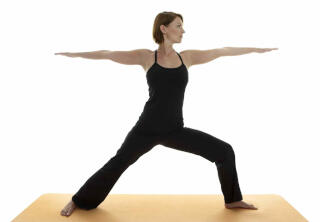

In [28]:
model.eval()
from PIL import Image
image_path = '/kaggle/input/yoga-pose-classification/YogaPoses/Warrior2/00000026.jpg'
image = Image.open(image_path)
image

In [29]:
image = transform(image).unsqueeze(0)


with torch.no_grad():
    output = model(image)

_, predicted_class = torch.max(output, 1)


dictt = {
    0: "Downdog",
    1: "Tree",
    2: "Plank",
    3: "Warrior",
    4: "Goddess"
}
print(f'Predicted class: {dictt[predicted_class.item()]}')

Predicted class: Warrior
